# Implementing KNN 

There are few essential libraries for this notebook code to work, please install all of them listed here so the code works fine without any issues

In [1]:
#pip install scikit-learn pandas matplotlib plotly nbformat ipython seaborn
#pip install --upgrade nbformat
#pip install ipykernel   
# Please restart the kernel after installing the ipykernel package

In [11]:
%matplotlib inline

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

The iris data set is imoprted from the provided csv file using the pandas library.
To get a insight into the data, I am using the head to list the first few records.

In [13]:
iris = pd.read_csv('iris.csv')
print(iris.head())
print(iris.Species.unique())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
['setosa' 'versicolor' 'virginica']


Now, since we have to select species “iris virginica” “iris versicolor”, below is the filtering for this.
For X we are dropping the species column because we want to predict the species based on other metrics


In [14]:
iris_filtered = iris[iris['Species'].isin(['virginica', 'versicolor'])]

X = iris_filtered.drop('Species', axis=1)
y = iris_filtered['Species']

#sns.pairplot(iris_filtered, hue='Species') #we can use pairplot to see the relationship between the features

E2: Use the kNN-classes of sklearn in Python and the caret package in R with K=5 and a train-test-split of 70-30 for an initial classification and calculate the accuracy using the test set.

Using the train_test_split function from sklearn lets split the data into training and test sets.
X is our feature matrix which has metrics for Sepal and Petal without species column and y is our target variable   
We are splitting the data into 70% training and 30% test data
The random_state parameter is used to ensure that the data is split in the same way every time the code is run, popular value being 42, but it can be any value 

The value of k if too less will be overfitting, too less will be underfitting

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# we will use the 5 neighbors for our knn model as instructed
knn = KNeighborsClassifier(n_neighbors=5)

# lets train the model with above data
knn.fit(X_train, y_train)

# Here we will start predicting the species of the iris
y_pred = knn.predict(X_test)

# lets now perform the accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with K=5: {accuracy:.2f}")

Accuracy with K=5: 0.90


Below is the confusion matrix. For different value of K, the confusion matrix changes its accuracies

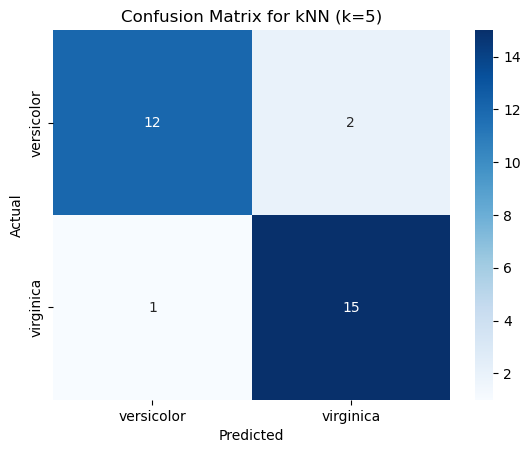

              precision    recall  f1-score   support

  versicolor       0.92      0.86      0.89        14
   virginica       0.88      0.94      0.91        16

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['versicolor', 'virginica'], yticklabels=['versicolor', 'virginica'])
plt.title('Confusion Matrix for kNN (k=5)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred, target_names=['versicolor', 'virginica']))

Below we will use the cross validation to split the data into 3 parts, training part, validation part, predict part using the test data. Here we are using 5 fold meaning we will split the data into 5 part, using 4 parts for training and remaining 5th part for testing it.

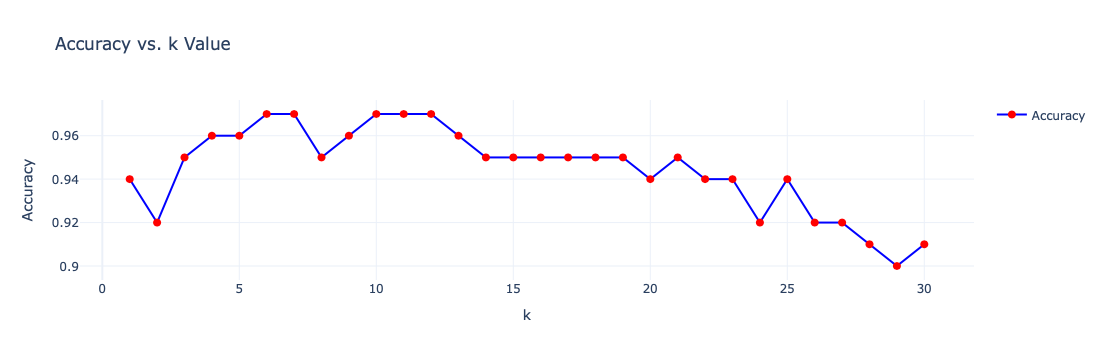

In [16]:
k_values = range(1, 31)
cv_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_accuracies.append(scores.mean())  # lets use the mean accuracy across folds

# Now for the plotting part to see the accuracy for different k values
fig = go.Figure()

# lets add some traces
fig.add_trace(
    go.Scatter(
        x=list(k_values),
        y=cv_accuracies,
        mode='lines+markers',
        name='Accuracy',
        line=dict(color='blue', width=2),
        marker=dict(size=8, color='red')
    )
)

fig.update_layout(
    title='Accuracy vs. k Value',
    xaxis_title='k',
    yaxis_title='Accuracy',
    template='plotly_white',
    #hovermode='x unified',
    dragmode=False,
    hovermode=False,
    showlegend=True
)

fig.show()


The graph shows that accuracy is highest at k=1,but this likely overfits the training data.

As k increases, accuracy stabilizes after k=10, indicating better generalization. 

A good choice for k is between 5 and 10, as it balances high accuracy and reduces overfitting. Overall, larger k values make the model more robust to noise in the data.

Explain the choice of a good k
The best k is the one that maximizes accuracy. 
From the plot, we can choose the k with the highest accuracy.

In [9]:
best_k = k_values[cv_accuracies.index(max(cv_accuracies))]
print(f"Best k value: {best_k} with accuracy: {max(cv_accuracies):.2f}")

Best k value: 6 with accuracy: 0.97


In the above KNN execution we used the default metric i.e, Euclidean.

Now lets use all these metrics Euclidean, Minkowaski and Mahattena. 

Lets also plot all the output from these results in a single graph to help us better visualize.

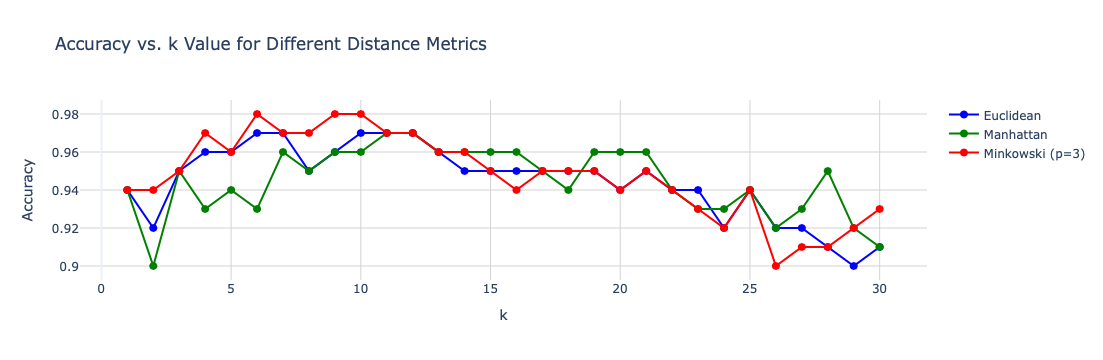

In [10]:
k_values = range(1, 31)

euclidean_accuracies = []
manhattan_accuracies = []
minkowski_accuracies = []

for k in k_values:
    # Euclidean
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores_euclidean = cross_val_score(knn_euclidean, X, y, cv=5, scoring='accuracy')
    euclidean_accuracies.append(scores_euclidean.mean())

    # Manhattan
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores_manhattan = cross_val_score(knn_manhattan, X, y, cv=5, scoring='accuracy')
    manhattan_accuracies.append(scores_manhattan.mean())

    # Minkowski using P more than 2
    #https://www.datacamp.com/tutorial/minkowski-distance
    knn_minkowski = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=3)
    scores_minkowski = cross_val_score(knn_minkowski, X, y, cv=5, scoring='accuracy')
    minkowski_accuracies.append(scores_minkowski.mean())


fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=list(k_values),
        y=euclidean_accuracies,
        mode='lines+markers',
        name='Euclidean',
        line=dict(color='blue', width=2),
        marker=dict(size=8, color='blue')
    )
)

fig.add_trace(
    go.Scatter(
        x=list(k_values),
        y=manhattan_accuracies,
        mode='lines+markers',
        name='Manhattan',
        line=dict(color='green', width=2),
        marker=dict(size=8, color='green')
    )
)

fig.add_trace(
    go.Scatter(
        x=list(k_values),
        y=minkowski_accuracies,
        mode='lines+markers',
        name='Minkowski (p=3)',
        line=dict(color='red', width=2),
        marker=dict(size=8, color='red')
    )
)

fig.update_layout(
    title='Accuracy vs. k Value for Different Distance Metrics',
    xaxis_title='k',
    yaxis_title='Accuracy',
    template='plotly_white',
    #hovermode='x unified',
    dragmode=False,
    hovermode=False,
    showlegend=True
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()

What can we notice from the above graph ? 
1. The sweet spot for k seems to be around 5-10 for all three distance metrics - that's where the accuracy peaks
2. It looks like Minkowski with p=3 (the red line) is the better performer compared to other two
3. All three metrics start pretty similar, then take different paths as k increases
4. There's this sharp dip at k=2 for all three metrics.
5. Manhattan distance (green) is fluctuating quite a bit here compared to others.
6. After about k=20, things generally go downhill for all metrics, too many neighbours might have the impact here.
7. Euclidean and Manhattan seem to occasionally swap places for second-best performance
8. The high performance for k value 1 and others could indicate that our data is well seperated.
9. The best performer with a better values here are Minkowski with p=3 at k=5 or k=10


Further more when we compare the graph with default distance(Euclidean distance) with the result of R, we can notice some differences.

In R plots, the accuracies even reach upto 1 when k is 6,7,8,9,11,12

But for the k values 14,15,16,17,18,19 in R they fall in 0.96 but for the same values in python the accuracy is 0.95.

Hence we can see that there are not much overlaps happening between these two implementations. It could be beacuse of the small data set that we have that is resulting this and also implementation details between the two libraries that could be causing the discrepanceis.


# E4 and E5

## Strengths and Weaknesses of kNN-Classifier (E4)

The Strengths of KNN are 
1. It is relatively simple to understand and implement.
2. As we saw in our results, it can hit high accuracy (98% with Minkowski) when tuned right
3. There is no training phase, when we have the data we could start using the model quickly.
4. In our case for the Iris data, the results were commendable, because the classes are fairly well-separated
5. Can handle non-linear boundaries, which is why it works on the tricky Versicolor-Virginica split

The Weakness being 
1. Slow at prediction time, with more data it would probably have advese effect.
2. Our results show it's quite sensitive to the k value (example dip at k=2?)
3. Distance metrics matter a lot, here Minkowski outperformed the others
4. Memory-hungry since it stores all training examples
5. Doesn't give you insights into feature importance like some other models would


Good real-world uses:

Anywhere there is a classificaion/grouping involved for example product recomendation on online stores


Bad real-world uses:

Very large data sets, higer dimension data etc.


## E5: Biases in the Iris Dataset
Potential biases:

Relatively sample size
1. All collected from the same geographic region
2. Collected by the same person, potentially introducing measurement bias
3. Setosa is way easier to separate than the other two species
4. Just four features, ignoring many other potential flower characteristics
5. Perfectly balanced classes (50 of each) which rarely happens in real life

How these affect results:

1. The high accuracy we're seeing probably wouldn't hold up with more diverse samples
2. Our model looks better than it is because Setosa is so easy to identify
3. The 98% accuracy is misleading - errors are concentrated in the Versicolor-Virginica boundary
4. With such a small dataset, a few outliers can significantly skew results
5. The k sensitivity we observed might be even worse in less pristine real-world data

